In [2]:
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img_ds = gdal.Open('/content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/LE70220491999322EDC01_stack.gtif',gdal.GA_ReadOnly)
roi_ds = gdal.Open('/content/drive/MyDrive/NESAC/SupervisedClassification-Tutorial-master/SupervisedClassification-Tutorial-master/example/training_data.gtif',gdal.GA_ReadOnly)

In [7]:
roi_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fed5b240d80> >

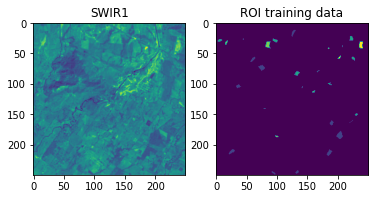

In [5]:
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))
for b in range(img.shape[2]):
  img[:,:,b] = img_ds.GetRasterBand(b+1).ReadAsArray()

roi = roi_ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)

plt.subplot(121)
plt.imshow(img[:,:,4])
plt.title('SWIR1')

plt.subplot(122)
plt.imshow(roi)
plt.title('ROI training data')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split

features = img[roi > 0,:]
features = features[:,:7]
labels = roi[roi > 0]
print(features.shape)
print(labels.shape)

xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.4, random_state=42)

print(xTrain.shape)
print(xTest.shape)

(718, 7)
(718,)
(430, 7)
(288, 7)


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, oob_score=True)

rf = rf.fit(xTrain, yTrain)

In [9]:
print('Our OOB prediction of accuracy is: {oob}%'.format(oob=rf.oob_score_ * 100))

Our OOB prediction of accuracy is: 97.67441860465115%


Features score importance  can be visualized in this plot

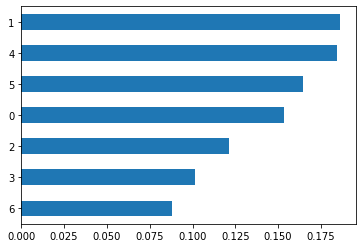

In [10]:
import pandas as pd
features_importance = pd.Series(rf.feature_importances_).sort_values()
features_importance.plot(kind='barh')

In [11]:
y_predict = rf.predict(xTest)

In [12]:
y_predict

array([4, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 3, 4, 1, 5, 1, 1, 4, 3, 4,
       1, 1, 4, 4, 2, 3, 3, 3, 1, 4, 1, 3, 3, 1, 3, 1, 4, 4, 4, 1, 1, 5,
       4, 3, 1, 1, 4, 1, 3, 4, 1, 1, 1, 1, 3, 4, 1, 4, 1, 1, 1, 1, 5, 1,
       3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 5, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 3, 4, 1, 1, 3, 3, 1, 5, 1, 2, 1, 1, 1, 4, 3, 1, 1, 1, 5, 1, 1,
       4, 3, 4, 1, 4, 3, 4, 1, 3, 1, 4, 3, 3, 3, 3, 3, 1, 1, 1, 5, 5, 1,
       4, 1, 1, 1, 1, 4, 1, 4, 3, 3, 3, 1, 3, 5, 1, 1, 1, 5, 4, 1, 1, 4,
       3, 3, 3, 1, 1, 1, 4, 5, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 1, 4, 1, 3,
       1, 1, 4, 1, 1, 1, 5, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 3, 4, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 4, 5, 1, 3, 3, 3, 4,
       1, 1, 3, 1, 1, 1, 4, 5, 1, 1, 1, 1, 4, 1, 3, 3, 5, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 3, 1, 1, 1, 4, 4, 3, 1, 3, 1, 1, 1, 5, 1, 4, 1, 1,
       1, 1, 5, 4, 4, 1, 1, 1, 5, 1, 1, 5, 3, 1, 1, 3, 2, 4, 3, 4, 3, 1,
       4, 4], dtype=uint8)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
conf_mat = confusion_matrix(yTest,y_predict)

print(conf_mat)
print(classification_report(yTest,y_predict))

[[152   0   0   0   0]
 [  0   3   0   0   0]
 [  0   0  66   0   0]
 [  0   0   0  44   1]
 [  0   0   0   4  18]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       152
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        66
           4       0.92      0.98      0.95        45
           5       0.95      0.82      0.88        22

    accuracy                           0.98       288
   macro avg       0.97      0.96      0.96       288
weighted avg       0.98      0.98      0.98       288



**Cross Validation**

[  1  11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171
 181 191 201 211 221 231 241 251 261 271 281 291 301 311 321 331 341 351
 361 371 381 391 401 411 421 431 441 451 461 471 481 491]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

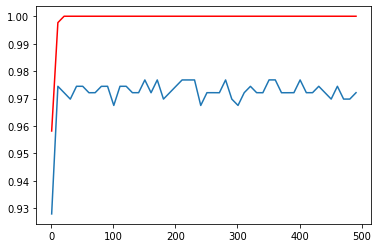

In [16]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1,500,10)
print(param_range)
train_score,test_score = validation_curve(rf,xTrain,yTrain,
                                          param_name='n_estimators',
                                          param_range=param_range,
                                          cv=3, scoring='accuracy',
                                          n_jobs=1)

train_mean=np.mean(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)

plt.plot(param_range,train_mean,color='red')
plt.plot(param_range,test_mean)

In [17]:
img_as_array = img[:, :, :7].reshape(62500,7)
print('Reshaped from {o} to {n}'.format(o=img.shape,
                                        n=img_as_array.shape))

# Now predict for each pixel
class_prediction = rf.predict(img_as_array)

# Reshape our classification map
class_prediction = class_prediction.reshape(img[:, :, 0].shape)
print(class_prediction.shape)

Reshaped from (250, 250, 8) to (62500, 7)
(250, 250)


(250, 250)


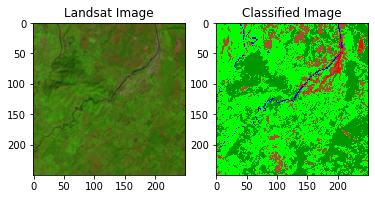

In [18]:
def color_stretch(image, index, minmax=(0, 10000)):
    colors = image[:, :, index].astype(np.float64)

    max_val = minmax[1]
    min_val = minmax[0]

    colors[colors[:, :, :] > max_val] = max_val
    colors[colors[:, :, :] < min_val] = min_val

    for b in range(colors.shape[2]):
        colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)
        
    return colors
    
img543 = color_stretch(img, [4, 3, 2], (0, 8000))

n = class_prediction.max()

colors = dict((
    (0, (0, 0, 0, 255)),  # Nodata
    (1, (0, 150, 0, 255)),  # Forest
    (2, (0, 0, 255, 255)),  # Water
    (3, (0, 255, 0, 255)),  # Herbaceous
    (4, (160, 82, 45, 255)),  # Barren
    (5, (255, 0, 0, 255))  # Urban
))
# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(1, n + 1)]
cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n)

plt.subplot(121)
plt.imshow(img543)
plt.title('Landsat Image')
print(class_prediction.shape)
plt.subplot(122)
plt.imshow(class_prediction, cmap=cmap, interpolation='none')
plt.title('Classified Image')

plt.show()